In [1]:
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
from pivottablejs import pivot_ui
from jupyter_core.paths import jupyter_data_dir

In [2]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Read in and Clean Data

In [3]:
df = pd.read_csv('project_3_final_table.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'caseid_new', 'children_in_hh', 'age_difference',
       'race_gap', 'religious_gap', 'edu_gap', 'met_online', 'met_at_work',
       'met_at_school', 'met_at_church', 'met_travel', 'met_social',
       'met_party', 'met_f_and_f', 'met_as_neighbors', 'met_public_space',
       'met_offline_dating', 'met_other', 'how_met_count', 'relationship_len',
       'partner_deceased', 'married_w1_married', 'married_w1_not married',
       'age_gap_bin_0 to 3', 'age_gap_bin_11 to 20', 'age_gap_bin_4 to 5',
       'age_gap_bin_6 to 10', 'age_gap_bin_>=20',
       'same_sex_couple_different sex couple',
       'same_sex_couple_same-sex couple', 'edu_gap_bin_0 to 2',
       'edu_gap_bin_3 to 4', 'edu_gap_bin_5 to 6', 'edu_gap_bin_>6',
       'parental_approval_approve', 'parental_approval_dont_approve',
       'relationship_quality_w1_excellent', 'relationship_quality_w1_fair',
       'relationship_quality_w1_good', 'relationship_quality_w1_poor',
       'relationship_quality_w1_v

In [5]:
df.head()

,Unnamed: 0,caseid_new,children_in_hh,age_difference,race_gap,religious_gap,edu_gap,met_online,met_at_work,met_at_school,...,region_south,region_west,partner_political,resondent_political,income_gap_raw,same_political,income_gap,respondent_earn_more,relationship_quality_w1,relationship_len_cat
0,0,22526,0,4.0,1,1,2.0,1,0,0,...,0,0,democrat,democrat,partner earned more,1,1.0,0.0,good,second_quartile
1,1,23286,0,2.0,0,1,1.0,0,0,1,...,0,1,democrat,democrat,i earned more,1,1.0,1.0,good,second_quartile
2,2,26315,0,9.0,0,1,2.0,1,0,0,...,1,0,democrat,democrat,i earned more,1,1.0,1.0,good,bottom_quartile
3,3,28536,0,2.0,0,1,1.0,0,0,0,...,0,0,democrat,democrat,i earned more,1,1.0,1.0,good,second_quartile
4,4,29584,0,7.0,0,0,0.0,0,1,0,...,1,0,democrat,democrat,partner earned more,1,1.0,0.0,good,top_quartile


In [6]:
# check which columns have NaN
# df.isnull().sum()

# age_difference                           19
# relationship_len                         27
# age_when_met                             15
# family_size                              13
# income_gap                               31
# respondent_earn_more                    405
# relationship_quality_w1                  13

In [7]:
df['relationship_quality_w1'].value_counts()

excellent    1771
good          911
fair          252
poor           42
very poor      20
Name: relationship_quality_w1, dtype: int64

In [8]:
df['respondent_earn_more'].value_counts()

1.0    1332
0.0    1272
Name: respondent_earn_more, dtype: int64

In [9]:
# Fill NaN with either mode or mean

df['age_difference'].fillna(round(df['age_difference'].mean()), inplace=True)
df['relationship_len'].fillna(round(df['relationship_len'].mean()), inplace=True)
df['age_when_met'].fillna(round(df['age_when_met'].mean()), inplace=True)
df['family_size'].fillna(round(df['family_size'].mean()), inplace=True)
df['income_gap'].fillna(round(df['income_gap'].mean()), inplace=True)
df['relationship_quality_w1'].fillna(0, inplace=True)
df['respondent_earn_more'].fillna(0, inplace=True)

In [10]:
# df.isnull().sum()

## Select columns for regression

In [11]:
df.columns

Index(['Unnamed: 0', 'caseid_new', 'children_in_hh', 'age_difference',
       'race_gap', 'religious_gap', 'edu_gap', 'met_online', 'met_at_work',
       'met_at_school', 'met_at_church', 'met_travel', 'met_social',
       'met_party', 'met_f_and_f', 'met_as_neighbors', 'met_public_space',
       'met_offline_dating', 'met_other', 'how_met_count', 'relationship_len',
       'partner_deceased', 'married_w1_married', 'married_w1_not married',
       'age_gap_bin_0 to 3', 'age_gap_bin_11 to 20', 'age_gap_bin_4 to 5',
       'age_gap_bin_6 to 10', 'age_gap_bin_>=20',
       'same_sex_couple_different sex couple',
       'same_sex_couple_same-sex couple', 'edu_gap_bin_0 to 2',
       'edu_gap_bin_3 to 4', 'edu_gap_bin_5 to 6', 'edu_gap_bin_>6',
       'parental_approval_approve', 'parental_approval_dont_approve',
       'relationship_quality_w1_excellent', 'relationship_quality_w1_fair',
       'relationship_quality_w1_good', 'relationship_quality_w1_poor',
       'relationship_quality_w1_v

In [12]:
df['how_met_count'].value_counts()

1    1254
2    1196
3     437
4      71
0      36
5      12
6       3
Name: how_met_count, dtype: int64

In [13]:
### Megan's columns ####
# 'children_in_hh', 'age_difference', 'race_gap', 'religious_gap',
#        'edu_gap', 'married_w1_married', 'same_sex_couple_different sex couple',
#        'parental_approval_approve', 'age_when_met', 'family_size', 'region',
#        'metro', 'same_political', 'income_gap', 'how_met'

X = df[['children_in_hh', 'race_gap', 'religious_gap',
        'met_online', 'met_at_work','met_at_school', 'met_at_church', 'met_travel', 'met_social',
        'met_party', 'met_f_and_f', 'met_as_neighbors', 'met_public_space',
        'met_offline_dating','met_other',
        'married_w1_married', 
        'age_gap_bin_0 to 3', 'age_gap_bin_11 to 20', 'age_gap_bin_4 to 5','age_gap_bin_6 to 10',
        'same_sex_couple_different sex couple',
        'edu_gap_bin_0 to 2','edu_gap_bin_3 to 4','edu_gap_bin_5 to 6',
        'parental_approval_approve','age_when_met', 'family_size','metro',
        'region_midwest', 'region_northeast', 'region_south',
        'same_political', 'income_gap']]

print(X.shape)

(3009, 33)


In [14]:
# ### All columns ####

# X = df[['children_in_hh', 'race_gap', 'religious_gap',
#         'met_online', 'met_at_work','met_at_school', 'met_at_church', 'met_travel', 'met_social',
#         'met_party', 'met_f_and_f', 'met_as_neighbors', 'met_public_space',
#         'met_offline_dating', 'met_other',
#         'married_w1_married', 
#         'age_gap_bin_0 to 3', 'age_gap_bin_11 to 20', 'age_gap_bin_4 to 5','age_gap_bin_6 to 10', 'age_gap_bin_>=20',
#         'same_sex_couple_different sex couple',
#         'edu_gap_bin_0 to 2','edu_gap_bin_3 to 4','edu_gap_bin_5 to 6','edu_gap_bin_>6',
#         'parental_approval_approve',
#         'relationship_quality_w1_excellent', 'relationship_quality_w1_fair',
#         'relationship_quality_w1_good', 'relationship_quality_w1_poor',
#         'relationship_quality_w1_very poor', 'age_when_met', 'family_size','metro',
#         'region_midwest', 'region_northeast', 'region_south','region_west',
#         'same_political', 'income_gap']]

In [15]:
# X = df[['children_in_hh', 'race_gap', 'religious_gap','married_w1_married', 
#         'age_gap_bin_0 to 3', 'age_gap_bin_11 to 20', 'age_gap_bin_4 to 5','age_gap_bin_6 to 10', 'age_gap_bin_>=20',
#         'same_sex_couple_different sex couple',
#         'edu_gap_bin_0 to 2','edu_gap_bin_3 to 4','edu_gap_bin_5 to 6','edu_gap_bin_>6',
#         'parental_approval_approve','age_when_met', 'family_size','metro',
#         'region_midwest', 'region_northeast', 'region_south','region_west',
#         'same_political', 'income_gap']]

In [16]:
# X = df[['children_in_hh', 'race_gap', 'religious_gap',
#         'met_online', 'age_gap_bin_0 to 3','same_sex_couple_different sex couple',
#         'edu_gap_bin_0 to 2','parental_approval_approve',
#         'relationship_quality_w1_excellent','age_when_met', 'family_size','metro',
#         'region_midwest', 'region_northeast', 'region_south','region_west',
#         'same_political', 'income_gap']]

In [17]:
##  only the variables with positive coefficient

# X = df[['met_at_work','married_w1_married', 'relationship_quality_w1_excellent', 'region_northeast']]

## Genereate Y and train test split

In [18]:
y = df["relationship_len"].values.reshape(-1, 1)

print(y.shape)

(3009, 1)


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Scale the data

In [20]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [21]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_scaled = X_scaler.transform(X)

y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
y_scaled = y_scaler.transform(y)

## Fit model and run R2 and MSE scores

In [22]:
model = LinearRegression()

In [23]:
#### Using unscaled data
# model.fit(X_train, y_train)

In [24]:
#### Using scaled data

model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
##################################################################################
############## Calculate Model Performance Metrics #####
##################################################################################

In [26]:
predictions_test = model.predict(X_test_scaled)

In [27]:
from sklearn.metrics import mean_squared_error
 
MSE = mean_squared_error(y_test_scaled, predictions_test)
r2 = model.score(X_test_scaled, y_test_scaled)
 
print(f"Testing_MSE: {MSE}, Testing_R2: {r2}")

Testing_MSE: 0.5433874868840065, Testing_R2: 0.4700614296473073


In [28]:
###### Another Way to calculate R2 #########

training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)

print("training score: ", training_score)
print("test score: ", testing_score)

training score:  0.48471784606841506
test score:  0.4700614296473073


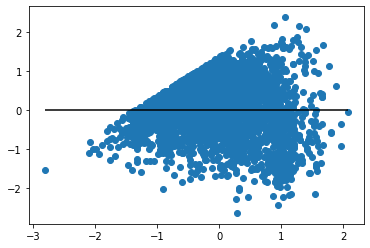

In [29]:
################### Check Residual Plots ####################


# Make predictions (scaled data)

# predictions_training = model.predict(X_train_scaled)
# predictions_test = model.predict(X_test_scaled)
predictions_all_X = model.predict(X_scaled)



################### Plot Residuals (scaled data)

# # 1) Training Data Residual Plot #####

# plt.scatter(predictions_training, predictions_training - y_train_scaled)
# plt.hlines(y=0, xmin=predictions_training.min(), xmax=predictions_training.max())


# # 2) Test Data Residual Plot #####

# plt.scatter(predictions_test, predictions_test - y_test_scaled)
# plt.hlines(y=0, xmin=predictions_test.min(), xmax=predictions_test.max())


# 3) All Data ####

plt.scatter(predictions_all_X, predictions_all_X - y_scaled)
plt.hlines(y=0, xmin=predictions_all_X.min(), xmax=predictions_all_X.max())


plt.show()

## Print out coefficients

In [30]:
print('Weight coefficients: ', model.coef_)

Weight coefficients:  [[-0.17715818 -0.05483112 -0.07781963 -0.14793812 -0.00277086 -0.06432209
  -0.00896388 -0.01024556 -0.04098941 -0.00615756 -0.02447235  0.01107447
  -0.00196395 -0.02160024  0.08637764  0.41415649 -0.12974603 -0.08274601
  -0.09400673 -0.11484528 -0.07852463 -0.19665036 -0.18370249 -0.06675242
  -0.32306003 -0.3098302  -0.01387314 -0.03204563 -0.00182221  0.00692516
   0.00350444 -0.00059348  0.00660748]]


In [31]:
print('y-axis intercept: ', model.intercept_) 

y-axis intercept:  [1.77289314e-16]


## Make the coefficients more readable

In [32]:
columns = X.columns
columns

Index(['children_in_hh', 'race_gap', 'religious_gap', 'met_online',
       'met_at_work', 'met_at_school', 'met_at_church', 'met_travel',
       'met_social', 'met_party', 'met_f_and_f', 'met_as_neighbors',
       'met_public_space', 'met_offline_dating', 'met_other',
       'married_w1_married', 'age_gap_bin_0 to 3', 'age_gap_bin_11 to 20',
       'age_gap_bin_4 to 5', 'age_gap_bin_6 to 10',
       'same_sex_couple_different sex couple', 'edu_gap_bin_0 to 2',
       'edu_gap_bin_3 to 4', 'edu_gap_bin_5 to 6', 'parental_approval_approve',
       'age_when_met', 'family_size', 'metro', 'region_midwest',
       'region_northeast', 'region_south', 'same_political', 'income_gap'],
      dtype='object')

In [33]:
numbers = model.coef_[0]
numbers

array([-0.17715818, -0.05483112, -0.07781963, -0.14793812, -0.00277086,
       -0.06432209, -0.00896388, -0.01024556, -0.04098941, -0.00615756,
       -0.02447235,  0.01107447, -0.00196395, -0.02160024,  0.08637764,
        0.41415649, -0.12974603, -0.08274601, -0.09400673, -0.11484528,
       -0.07852463, -0.19665036, -0.18370249, -0.06675242, -0.32306003,
       -0.3098302 , -0.01387314, -0.03204563, -0.00182221,  0.00692516,
        0.00350444, -0.00059348,  0.00660748])

In [34]:
coef_df=pd.DataFrame(numbers,columns,columns=['coef'])
coef_df=coef_df.reset_index()
coef_df=coef_df.rename(columns={'index':'X_variables'})
coef_df['abs_coef'] = abs(coef_df['coef'])
coef_df = coef_df.sort_values(['abs_coef'],ascending=False)
coef_df

,X_variables,coef,abs_coef
15,married_w1_married,0.414156,0.414156
24,parental_approval_approve,-0.323060,0.323060
25,age_when_met,-0.309830,0.309830
21,edu_gap_bin_0 to 2,-0.196650,0.196650
22,edu_gap_bin_3 to 4,-0.183702,0.183702
0,children_in_hh,-0.177158,0.177158
3,met_online,-0.147938,0.147938
16,age_gap_bin_0 to 3,-0.129746,0.129746
19,age_gap_bin_6 to 10,-0.114845,0.114845
18,age_gap_bin_4 to 5,-0.094007,0.094007


## Test with sample prediction

In [35]:
sample_x = X.iloc[[10]]
sample_x

,children_in_hh,race_gap,religious_gap,met_online,met_at_work,met_at_school,met_at_church,met_travel,met_social,met_party,...,edu_gap_bin_5 to 6,parental_approval_approve,age_when_met,family_size,metro,region_midwest,region_northeast,region_south,same_political,income_gap
10,0,0,0,1,0,0,0,0,0,0,...,0,0,49.0,3.0,0,1,0,0,1,1.0


In [36]:
sample_x_scaled = X_scaler.transform(sample_x)
sample_x_scaled

array([[-0.52700729, -0.46282699, -1.15142225,  2.94659183, -0.57325553,
        -0.49361971, -0.28456542, -0.20027643, -0.33366158, -0.4543315 ,
        -0.88271162, -0.31784413, -0.6060303 , -0.12369935, -0.1681038 ,
        -1.35038121,  0.91495003, -0.32622802, -0.43141613, -0.46564845,
        -2.31407208,  0.65271968, -0.52812079, -0.21536525, -1.11569535,
         1.82446671, -0.18048337, -2.4288027 ,  1.84327448, -0.50124637,
        -0.69374847,  0.86222458,  0.37489466]])

In [37]:
sample_x_prediction_scaled = model.predict(sample_x_scaled)

In [38]:
sample_x_prediction_scaled

array([[-0.68973233]])

In [39]:
sample_x_prediction_unscaled = y_scaler.inverse_transform(sample_x_prediction_scaled)
sample_x_prediction_unscaled

array([[10.8504317]])

## Build a UI to take inputs

In [40]:
# See what the shape of input looks like

shape_of_input = X.iloc[[5]]
print(shape_of_input.columns)
shape_of_input.shape

Index(['children_in_hh', 'race_gap', 'religious_gap', 'met_online',
       'met_at_work', 'met_at_school', 'met_at_church', 'met_travel',
       'met_social', 'met_party', 'met_f_and_f', 'met_as_neighbors',
       'met_public_space', 'met_offline_dating', 'met_other',
       'married_w1_married', 'age_gap_bin_0 to 3', 'age_gap_bin_11 to 20',
       'age_gap_bin_4 to 5', 'age_gap_bin_6 to 10',
       'same_sex_couple_different sex couple', 'edu_gap_bin_0 to 2',
       'edu_gap_bin_3 to 4', 'edu_gap_bin_5 to 6', 'parental_approval_approve',
       'age_when_met', 'family_size', 'metro', 'region_midwest',
       'region_northeast', 'region_south', 'same_political', 'income_gap'],
      dtype='object')


(1, 33)

In [41]:
### Testing how pd.DataFrame works
# data = [0,0,0,0]
# test_df = pd.DataFrame([data],columns=['a','b','c','d'])
# test_df


### Create an empty containter to take user inputs

user_input_default = [0,0,0,0,0,\
                     0,0,0,0,0,\
                     0,0,0,0,0,\
                     0,0,0,0,0,\
                     0,0,0,0,0,\
                     0,0,0,0,0,\
                     0,0,0]

user_input_df = pd.DataFrame([user_input_default], columns=['children_in_hh', 'race_gap',\
                                      'religious_gap', 'met_online','met_at_work',\
                                      'met_at_school', 'met_at_church', 'met_travel','met_social', 'met_party',\
                                      'met_f_and_f', 'met_as_neighbors','met_public_space', 'met_offline_dating', 'met_other',\
                                      'married_w1_married', \
                                      'age_gap_bin_0 to 3', 'age_gap_bin_11 to 20','age_gap_bin_4 to 5', 'age_gap_bin_6 to 10',\
                                      'same_sex_couple_different sex couple',\
                                      'edu_gap_bin_0 to 2','edu_gap_bin_3 to 4', 'edu_gap_bin_5 to 6',\
                                      'parental_approval_approve','age_when_met', 'family_size', 'metro', 'region_midwest',\
                                      'region_northeast', 'region_south', 'same_political', 'income_gap'])


user_input_df

,children_in_hh,race_gap,religious_gap,met_online,met_at_work,met_at_school,met_at_church,met_travel,met_social,met_party,...,edu_gap_bin_5 to 6,parental_approval_approve,age_when_met,family_size,metro,region_midwest,region_northeast,region_south,same_political,income_gap
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
######## Question 1,2 and 3

print('USER INPUTS STARTING NOW!!')
print('---------------------------')

user_childen_in_hh = input('How many kids do you have in the household now? \n')
user_race_gap = input('Are you and your partner of the same races?  0 = same race, 1 = diff race \n')
user_religious_gap = input('Do you have the same religicous belief?  0 = same belief, 1 = diff belief ')

USER INPUTS STARTING NOW!!
---------------------------
How many kids do you have in the household now? 
0
Are you and your partner of the same races?  0 = same race, 1 = diff race 
0
Do you have the same religicous belief?  0 = same belief, 1 = diff belief 1


In [43]:
######## Question 4,5 and 6


print('How did you meet your partner?')
print('Options are: ')
print('1_met_online,\n2_met_at_work,\n3_met_at_school,\n4_met_at_church,\n5_met_travel,\n6_met_social,\n7_met_party,\n8_met_f_and_f,\n9_met_as_neighbors,\n10_met_public_space,\n11_met_offline_dating')
user_how_met = input('your answer is: please enter the exact same string after the number ')
print('\n')
user_married = input('Are you and your partner married? 1 = Yes, 0 = No ')
print('\n')
print('Which option best describes the age gap between you and your partner? ')
print('1. age gap is between 0 to 3 years. Enter "age_gap_bin_0 to 3" ')
print('2. age gap is between 4 to 5 years. Enter "age_gap_bin_4 to 5" ')
print('3. age gap is between 6 to 10 years. Enter "age_gap_bin_6 to 10" ')
print('4. age gap is between 11 to 20 years. Enter "age_gap_bin_11 to 20" ')
print('5. age gap is >20 years. Enter "none_of_the_above" ')

user_age_gap = input('Please provide your answer: ')

How did you meet your partner?
Options are: 
1_met_online,
2_met_at_work,
3_met_at_school,
4_met_at_church,
5_met_travel,
6_met_social,
7_met_party,
8_met_f_and_f,
9_met_as_neighbors,
10_met_public_space,
11_met_offline_dating
your answer is: please enter the exact same string after the number met_at_school


Are you and your partner married? 1 = Yes, 0 = No 1


Which option best describes the age gap between you and your partner? 
1. age gap is between 0 to 3 years. Enter "age_gap_bin_0 to 3" 
2. age gap is between 4 to 5 years. Enter "age_gap_bin_4 to 5" 
3. age gap is between 6 to 10 years. Enter "age_gap_bin_6 to 10" 
4. age gap is between 11 to 20 years. Enter "age_gap_bin_11 to 20" 
5. age gap is >20 years. Enter "none_of_the_above" 
Please provide your answer: age_gap_bin_0 to 3


In [44]:
######## Question 7,8 and 9

user_sexuality = input('Are you a same sex couple? 1 = different sex; 0 = same sex ')
print('\n')
print('Which option best describes the education gap between you and your partner? ')
print('1. education gap is between 0 to 2 years. Enter "edu_gap_bin_0 to 2"')
print('2. education gap is between 3 to 4 years. Enter "edu_gap_bin_3 to 4"')
print('3. education gap is between 5 to 6 years. Enter "edu_gap_bin_5 to 6"')
print('4. education gap is >6 years. Enter "none_of_the_above"')
user_edu_gap = input('Please provide your answer: ')
print('\n')
user_parental = input('Do you have parental approval for your relationship? 1 = Approved; 0 = Not approved ')

Are you a same sex couple? 1 = different sex; 0 = same sex 1


Which option best describes the education gap between you and your partner? 
1. education gap is between 0 to 2 years. Enter "edu_gap_bin_0 to 2"
2. education gap is between 3 to 4 years. Enter "edu_gap_bin_3 to 4"
3. education gap is between 5 to 6 years. Enter "edu_gap_bin_5 to 6"
4. education gap is >6 years. Enter "none_of_the_above"
Please provide your answer: edu_gap_bin_0 to 2


Do you have parental approval for your relationship? 1 = Approved; 0 = Not approved 1


In [45]:
######## Question 10, 11 and 12

user_age_when_met = input('How old were you when you met your partner? ')
user_family_size = input('How many people currently live in the same household? ')
user_metro = input('Do you live in a city or in a rural area? 1 = live in a city; 0 = live in a rural area ')

How old were you when you met your partner? 15
How many people currently live in the same household? 2
Do you live in a city or in a rural area? 1 = live in a city; 0 = live in a rural area 1


In [46]:
#### Question 13, 14 and 15

print('Which region do you live in? ')
print('Options are:')
print('1. region_midwest')
print('2. region_northeast')
print('3. region_south')
print('4. region_west')
print('Please enter the string after the number \n')
user_region = input('Your region is ')
user_political = input('Do you and your partner have the same political standing? 1 = Same; 0 = Different ')
user_income_gap = input('Do you and your partner have an income gap?\n1 = Yes there is a material gap; 0 = No gap, almost the same ')

Which region do you live in? 
Options are:
1. region_midwest
2. region_northeast
3. region_south
4. region_west
Please enter the string after the number 

Your region is region_west
Do you and your partner have the same political standing? 1 = Same; 0 = Different 1
Do you and your partner have an income gap?
1 = Yes there is a material gap; 0 = No gap, almost the same 0


In [47]:
print("these are your answers: ")
print('---------------------------------')
print('# of childen: ',user_childen_in_hh)
print('race gap? 0 = same race. ',user_race_gap)
print('religious gap? 0 = same belief. ',user_religious_gap)
print(user_how_met)
print('married or not? 1 = married. ',user_married)
print(user_age_gap)
print('same sex couple? 1 = different sex. ',user_sexuality)
print(user_edu_gap)
print('parental approval? 1 = approved 0 = not. ',user_parental)
print('age when met ', user_age_when_met)
print('family size: ',user_family_size)
print('metro or not? 1 = yes. 0 = no ', user_metro)
print(user_region)
print('same political standing? 1 = same. 0 = diff. ',user_political)
print('income gap? 1 = there is a gap. 0 = no gap. ',user_income_gap)

these are your answers: 
---------------------------------
# of childen:  0
race gap? 0 = same race.  0
religious gap? 0 = same belief.  0
met_at_school
married or not? 1 = married.  1
age_gap_bin_0 to 3
same sex couple? 1 = different sex.  1
edu_gap_bin_0 to 2
parental approval? 1 = approved 0 = not.  1
age when met  15
family size:  2
metro or not? 1 = yes. 0 = no  1
region_west
same political standing? 1 = same. 0 = diff.  1
income gap? 1 = there is a gap. 0 = no gap.  0


In [48]:
##################################################################################
############## Transfer the user inputs into the correct format ##################
##################################################################################

In [49]:
print(user_input_df.columns)
user_input_df

Index(['children_in_hh', 'race_gap', 'religious_gap', 'met_online',
       'met_at_work', 'met_at_school', 'met_at_church', 'met_travel',
       'met_social', 'met_party', 'met_f_and_f', 'met_as_neighbors',
       'met_public_space', 'met_offline_dating', 'met_other',
       'married_w1_married', 'age_gap_bin_0 to 3', 'age_gap_bin_11 to 20',
       'age_gap_bin_4 to 5', 'age_gap_bin_6 to 10',
       'same_sex_couple_different sex couple', 'edu_gap_bin_0 to 2',
       'edu_gap_bin_3 to 4', 'edu_gap_bin_5 to 6', 'parental_approval_approve',
       'age_when_met', 'family_size', 'metro', 'region_midwest',
       'region_northeast', 'region_south', 'same_political', 'income_gap'],
      dtype='object')


,children_in_hh,race_gap,religious_gap,met_online,met_at_work,met_at_school,met_at_church,met_travel,met_social,met_party,...,edu_gap_bin_5 to 6,parental_approval_approve,age_when_met,family_size,metro,region_midwest,region_northeast,region_south,same_political,income_gap
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# transfer all user inputs into DF

user_input_df['children_in_hh'] = user_childen_in_hh
user_input_df['race_gap'] = user_race_gap
user_input_df['religious_gap'] = user_religious_gap
user_input_df[user_how_met] = 1
user_input_df['married_w1_married'] = user_married

if user_age_gap != "none_of_the_above":
    user_input_df[user_age_gap] = 1

user_input_df['same_sex_couple_different sex couple'] = user_sexuality

if user_edu_gap != "none_of_the_above":
    user_input_df[user_edu_gap] = 1
    
user_input_df['parental_approval_approve'] = user_parental
user_input_df['age_when_met'] = user_age_when_met
user_input_df['family_size'] = user_family_size
user_input_df['metro'] = user_metro


if user_region != "region_west":
    user_input_df[user_region] = 1


user_input_df['same_political'] = user_political
user_input_df['income_gap'] = user_income_gap


In [51]:
# print out user input df to check

user_input_df

,children_in_hh,race_gap,religious_gap,met_online,met_at_work,met_at_school,met_at_church,met_travel,met_social,met_party,...,edu_gap_bin_5 to 6,parental_approval_approve,age_when_met,family_size,metro,region_midwest,region_northeast,region_south,same_political,income_gap
0,0,0,0,0,0,1,0,0,0,0,...,0,1,15,2,1,0,0,0,1,0


In [52]:
# Make a prediction!!

user_input_scaled = X_scaler.transform(user_input_df)
user_prediction_scaled = model.predict(user_input_scaled)
user_prediction_unscaled = y_scaler.inverse_transform(user_prediction_scaled)

print("Your relationship will last: ", round(user_prediction_unscaled[0][0]), " years")

Your relationship will last:  28.0  years


## Save the model

In [53]:
import joblib
filename = 'regression_match_megan.sav'
joblib.dump(model, filename)

['regression_match_megan.sav']